<a href="https://colab.research.google.com/github/Alexssandro-hub/applied-computational-intelligence/blob/main/ICA_N2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTS**




In [82]:
#Análise de Dados
import pandas as pd
import numpy as np
import os

#Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

#Algoritimos de Avaliação
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn import metrics

**LEITURA DO DATASET**


In [83]:
from google.colab import files

uploaded = files.upload()

data = pd.read_csv(next(iter(uploaded)))

Saving Hypertension-risk-model-main.csv to Hypertension-risk-model-main (1).csv


**CHECANDO DADOS FALTANTES**

In [84]:
missing_data=data.isnull().sum()
print("\nDados faltantes:")
print(missing_data)
total_percentage=(missing_data.sum()/data.shape[0])*100
print(f"Porcentagem total de dados faltantes: {round(total_percentage,2)}%")


Dados faltantes:
male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64
Porcentagem total de dados faltantes: 12.74%


**PORCENTAGEM DE DADOS FALTANTES POR FEATURE**

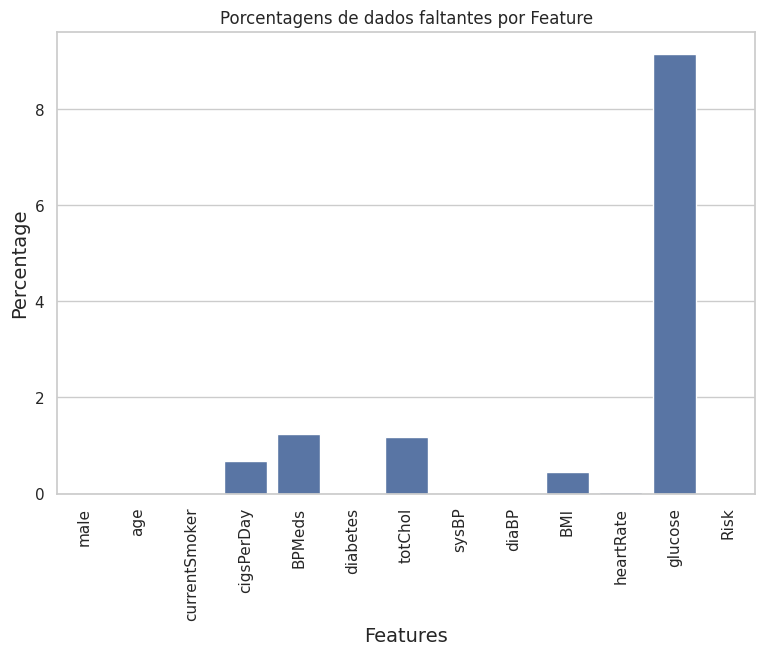

In [85]:
# Calcular dados faltantes por cada feature
missing_data = missing_data.to_frame(name='Total')  # Converte as séries para DataFrame
missing_data['Percentage'] = (missing_data['Total'] / len(data)) * 100

# Criação do gráfico
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)
plt.title("Porcentagens de dados faltantes por Feature")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=90)  # Rotação dos rótulos do eixo x para melhorar a legibilidade
plt.show()

**EXCLUINDO VALORES FALTANTES**

In [86]:
data.dropna(axis=0,inplace=True)

**CHECKANDO NOVAMENTE DADOS FALTANTES**

In [87]:
missing_data=data.isnull().sum()
print("\nDados Faltantes:")
print(missing_data)
total_percentage=(missing_data.sum()/data.shape[0])*100
print(f"Porcentagem total de dados faltantes: {round(total_percentage,2)}%")


Dados Faltantes:
male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Risk             0
dtype: int64
Porcentagem total de dados faltantes: 0.0%


In [88]:
data.shape

(3751, 13)

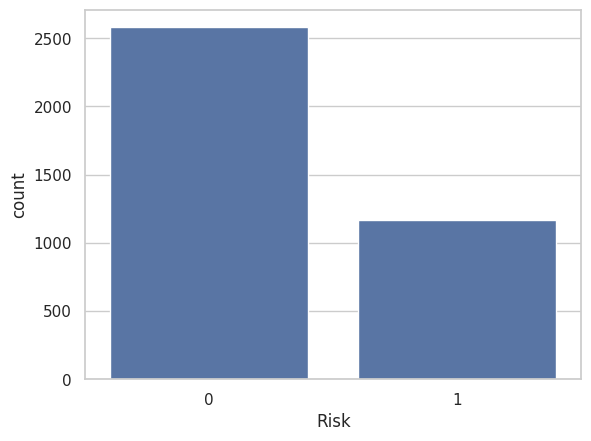

Há 2581 pacientes sem risco de hipertensão e 1170 pacientes com risco de hipertensão


In [89]:
sns.countplot(x="Risk",data=data)
plt.show()
cases=data.Risk.value_counts()
print(f"Há {cases[0]} pacientes sem risco de hipertensão e {cases[1]} pacientes com risco de hipertensão")


In [90]:
data["age"].unique #Array com itens únicos

<bound method Series.unique of 0       39
1       46
2       48
3       61
4       46
        ..
4233    50
4234    51
4237    52
4238    40
4239    39
Name: age, Length: 3751, dtype: int64>

In [91]:
data["age"].min() #Idade mínima

32

In [92]:
data["age"].max() #Idade máxima

70

<ipython-input-93-87cf14777946>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


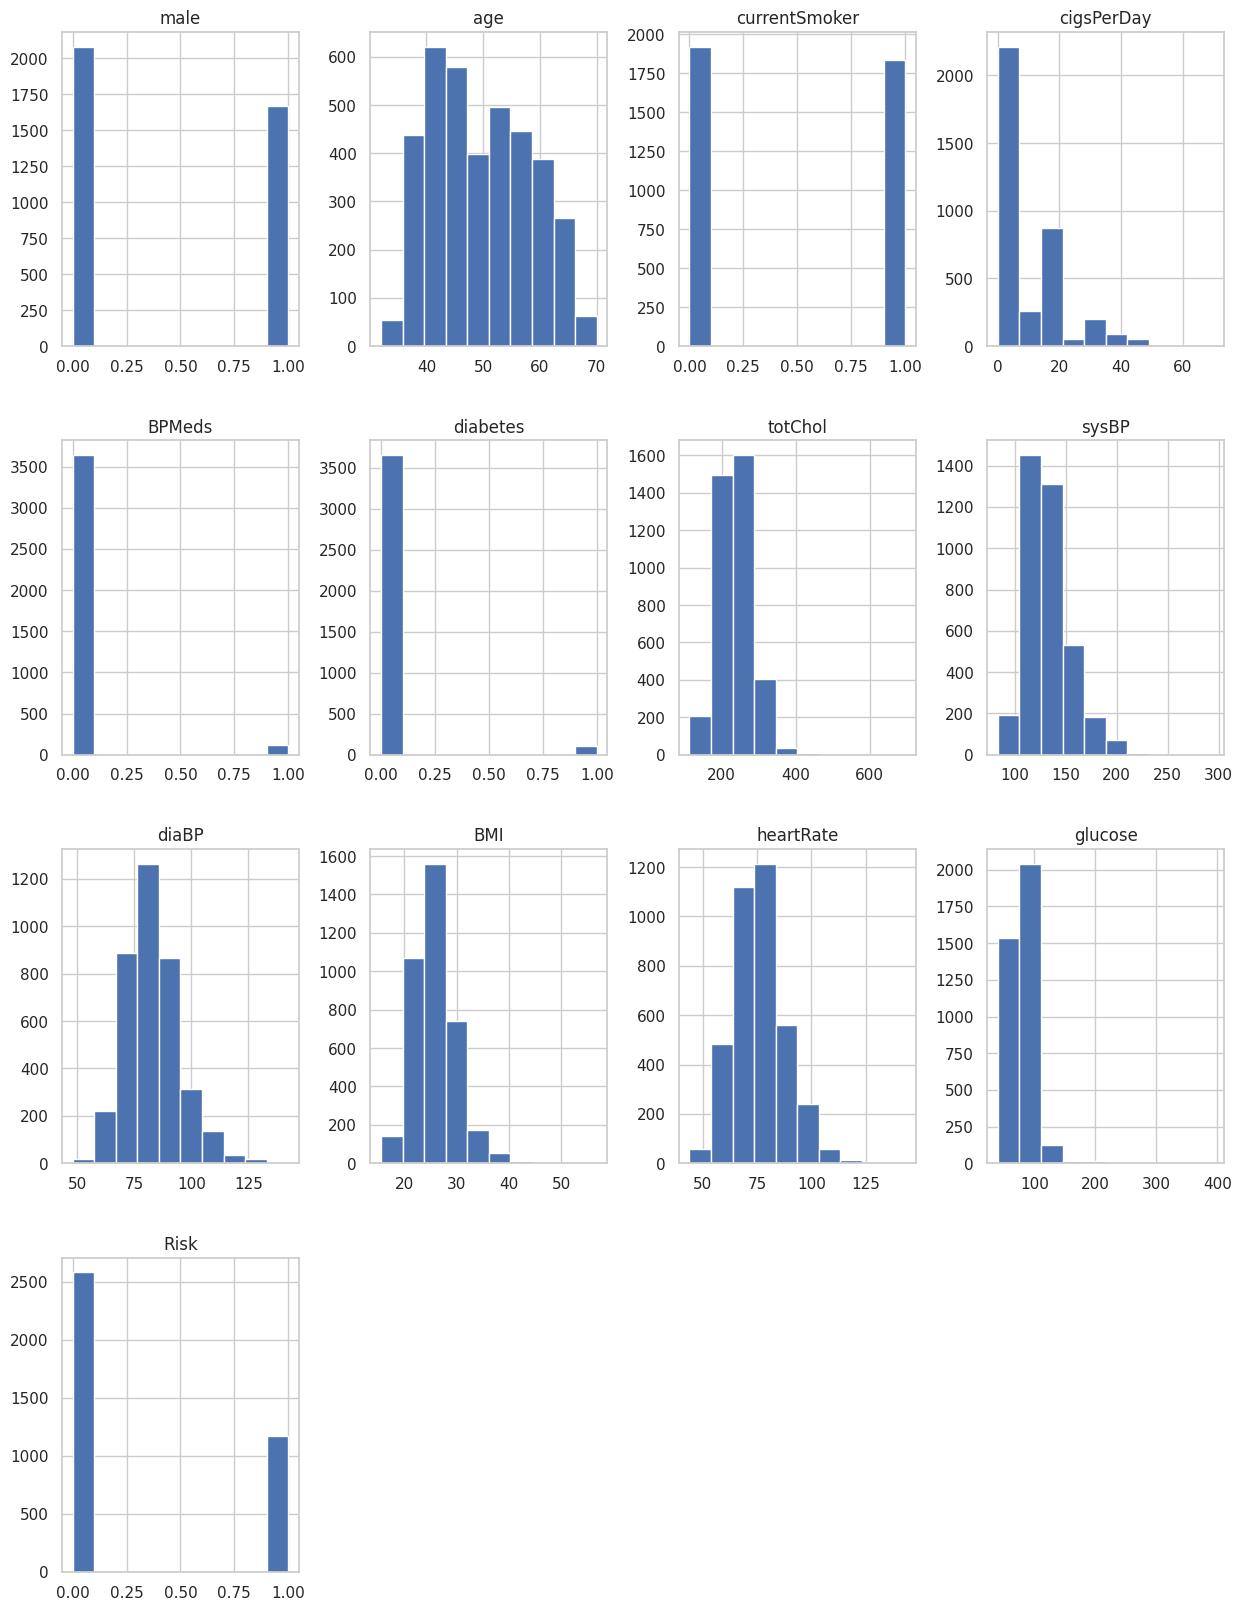

In [93]:
fig=plt.figure(figsize=(15,20))
ax =fig.gca()
data.hist(ax = ax)
plt.show()

**SEPARAÇÃO DE FEATURES CATEGÓRICAS E NUMÉRICAS**

In [94]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
      cont_val.append(column)

print(f'Features categóricas: {cate_val}');
print(f'Features contínuas: {cont_val}');

Features categóricas: ['male', 'currentSmoker', 'BPMeds', 'diabetes', 'Risk']
Features contínuas: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


**DISTRIBUIÇÃO DE DADOS - FEATURES**

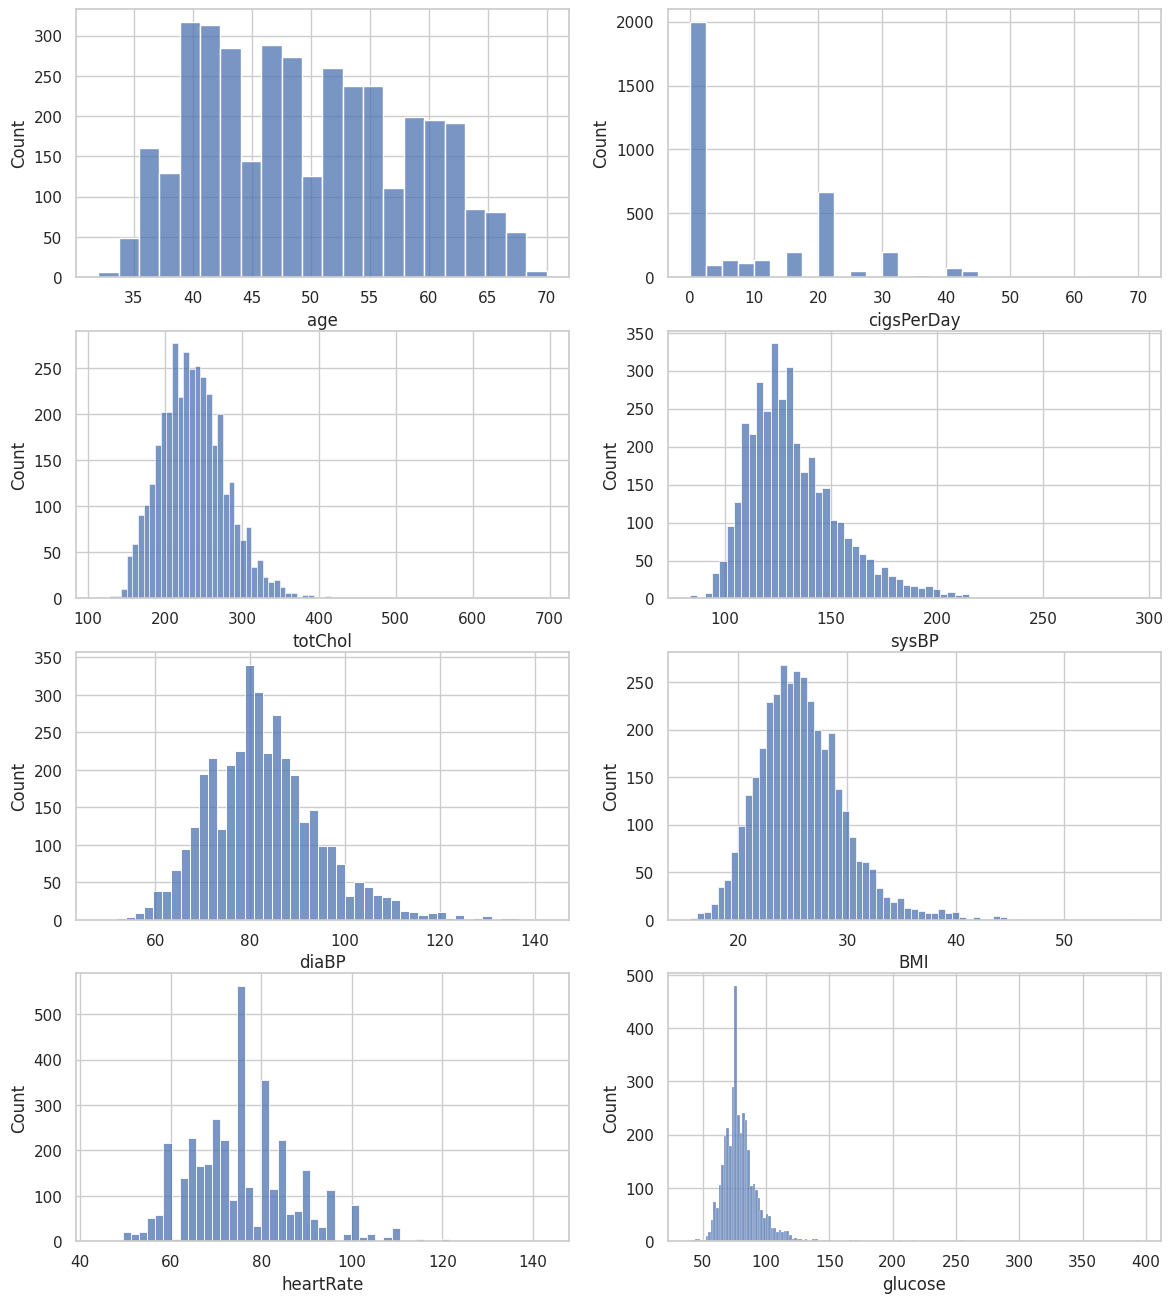

In [95]:
f, axes = plt.subplots(4, 2, figsize=(14,16))

index1 = 0
index2 = 0

for col in cont_val:
    sns.histplot(data[col], ax=axes[index1][index2]);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show();

**DISTRIBUIÇÃO DE IDADES BASEADAS NO RISCO DE HIPERTENSÃO**

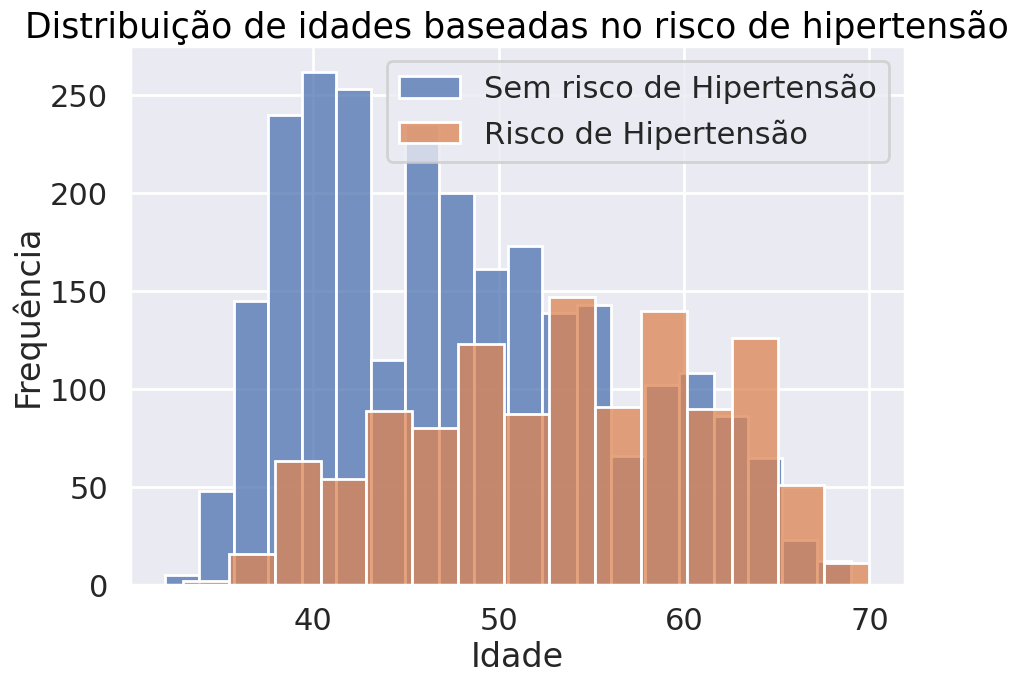

In [96]:
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Distribuição de idades baseadas no risco de hipertensão', color="Black",fontsize=25)

sns.histplot(data[data['Risk'] == 0]['age'], label='Sem risco de Hipertensão')
sns.histplot(data[data['Risk'] == 1]['age'], label = 'Risco de Hipertensão')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()
plt.show()

**DADOS POR GÊNERO**

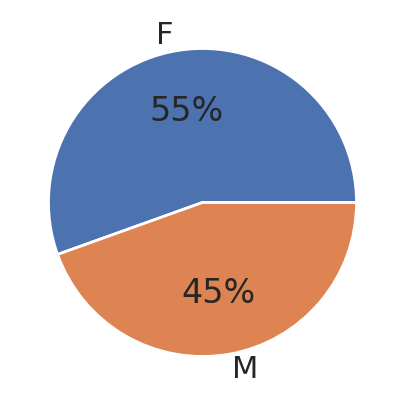

In [97]:
gender = ['F','M']
gender_data = pd.Series(data['male']).value_counts()

plt.figure(figsize=(5,5))
plt.pie(gender_data,labels=gender,autopct='%.0f%%')

plt.show()

**DATASET**

In [98]:
data.describe()

#Título: Hypertension-risk-model-main.csv
#Formato: CSV (Comma-Separated Values, valores separados por vírgula)
#Número de linhas: 4 (excluindo o cabeçalho)
#Número de colunas: 13

#Atributos:
#male (gênero)
#age (idade do indivíduo)
#currentSmoker (status de fumante)
#cigsPerDay (número de cigarros fumados por dia)
#BPMeds (uso de medicamentos para pressão arterial)
#diabetes (status do diabetes)
#totChol (nível de colesterol total)
#sysBP (pressão arterial sistólica)
#diaBP (pressão arterial diastólica)
#BMI (índice de massa corporal)
#heartRate (frequência cardíaca)
#glucose (nível de glicose)
#Risk (status de risco de hipertensão)

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.311917
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.463338
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [99]:
data["Risk"].value_counts(normalize=True)

,proportion
Risk,
0,0.688083
1,0.311917


In [ ]:
#15% dos dados indica um risco positivo de hipertensão em um futuro próximo

In [100]:
cate_val=data[['male','currentSmoker','BPMeds','diabetes']]

In [101]:
cate_val

,male,currentSmoker,BPMeds,diabetes
0,1,0,0.0,0
1,0,0,0.0,0
2,1,1,0.0,0
3,0,1,0.0,0
4,0,1,0.0,0
...,...,...,...,...
4233,1,1,0.0,0
4234,1,1,0.0,0
4237,0,0,0.0,0
4238,1,0,0.0,0


In [102]:
from sklearn.feature_selection import chi2
X = cate_val
y = data['Risk']

In [103]:
chi_scores = chi2(X,y)

In [104]:
chi_scores

(array([2.67929705e-02, 2.12611918e+01, 2.51482051e+02, 2.45535880e+01]),
 array([8.69978667e-01, 4.00763549e-06, 1.23407877e-56, 7.22716419e-07]))

<Axes: >

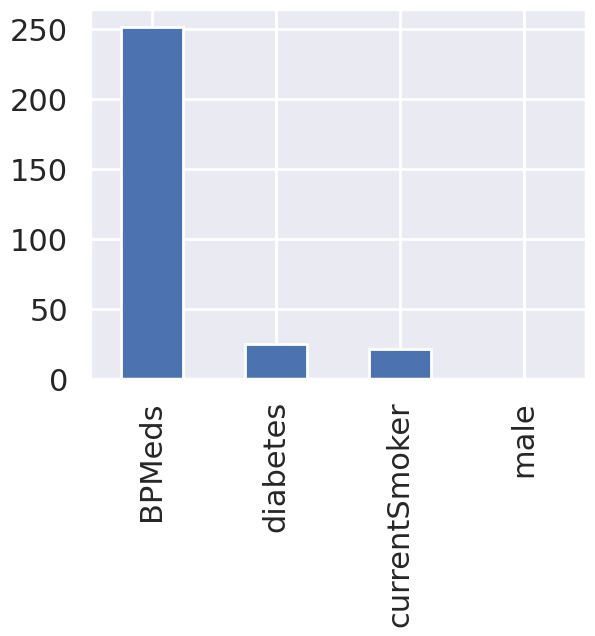

In [105]:
#Quanto maior o valor de chi, maior a importância
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

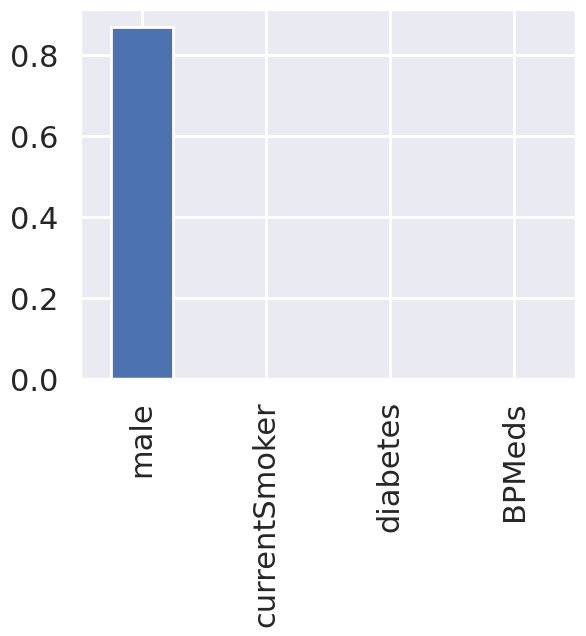

In [106]:
# if p-value > 0.05, baixa importância
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [107]:
data.head() #Colocando os recursos na mesma escala

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
df = pd.read_csv(next(iter(uploaded)))

# Atributo alvo
target_variable = 'Risk'

# Contando as ocorrências por cada classe
class_counts = df[target_variable].value_counts()

# Identificando a classe minoritária ou maioritária
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

# Print or use the information as needed
print(f"Minority class: {minority_class}")
print(f"Majority class: {majority_class}")

Minority class: 1
Majority class: 0


In [110]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [111]:
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk'],
      dtype='object')

In [112]:
X = data.drop('Risk',axis=1)

In [113]:
y = data['Risk']

In [114]:
X_train,X_test,y_train,y_test=train_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [115]:
y_test

,Risk
2435,0
1168,1
3761,1
496,0
3983,1
...,...
2723,0
3540,1
685,1
3036,0


In [116]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, f1_score, recall_score, classification_report


**CRIANDO RANDOM FOREST CLASSIFIER**

In [117]:
rf = RandomForestClassifier()

**TREINO**

In [118]:
rf.fit(X_train,y_train)

RandomForestClassifier()

**PREDIÇÃO**

In [119]:
 y_pred = rf.predict (X_test)
 y_prob = rf.predict_proba(X_test)[:, 1]

**ACURÁCIA**

In [120]:
accuracy_score(y_test,y_pred)

0.8948069241011984

AUC: 0.94
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       516
           1       0.80      0.88      0.84       235

    accuracy                           0.89       751
   macro avg       0.87      0.89      0.88       751
weighted avg       0.90      0.89      0.90       751



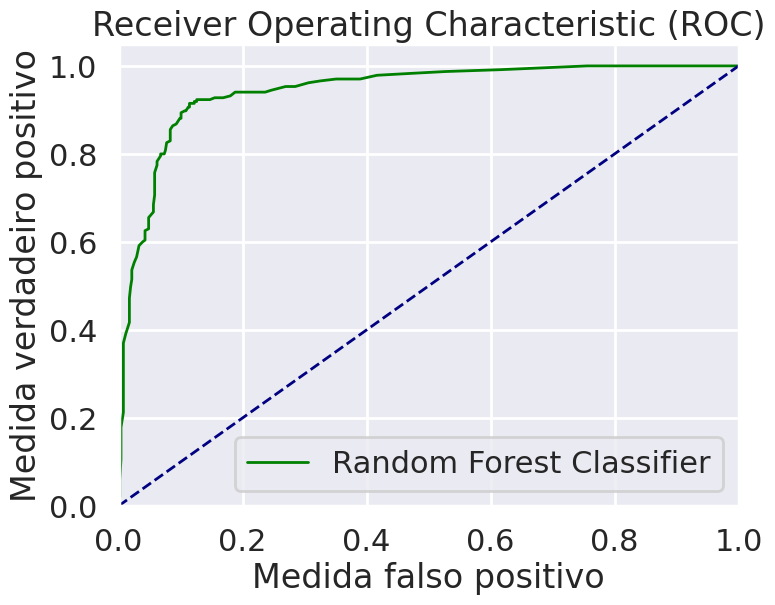

In [122]:
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc_score:.2f}')

y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plotando curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='Random Forest Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Medida falso positivo')
plt.ylabel('Medida verdadeiro positivo')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**MATRIZ DE CONFUSÃO**

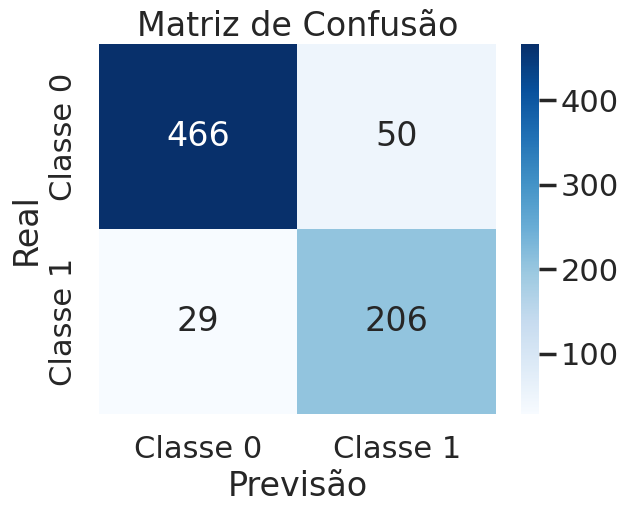

In [123]:
conf_matrix = confusion_matrix (y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

**DISTRIBUIÇÃO DE FALSOS/VERDADEIROS POSITIVOS E NEGATIVOS**

In [125]:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")

True Positive (TP): 206
True Negative (TN): 466
False Positive (FP): 50
False Negative (FN): 29


**RELATÓRIO DE CLASSES**

In [126]:
class_report = classification_report(y_test, y_pred)

precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"AUC: {auc_score:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print("Relatório de classificação:\n", class_report)

AUC: 0.94
Precisão: 0.80
F1-score: 0.84
Recall: 0.88
Relatório de classificação:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       516
           1       0.80      0.88      0.84       235

    accuracy                           0.89       751
   macro avg       0.87      0.89      0.88       751
weighted avg       0.90      0.89      0.90       751

